In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

url = 'https://raw.githubusercontent.com/pht2774/cardiovascular_detection/main/heart.csv'
data = pd.read_csv(url)

In [ ]:
print(data.shape)
data.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#drop incorrect values
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]

In [ ]:
print(data.shape)
data.head(10)

(296, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#check to see if any null presented
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

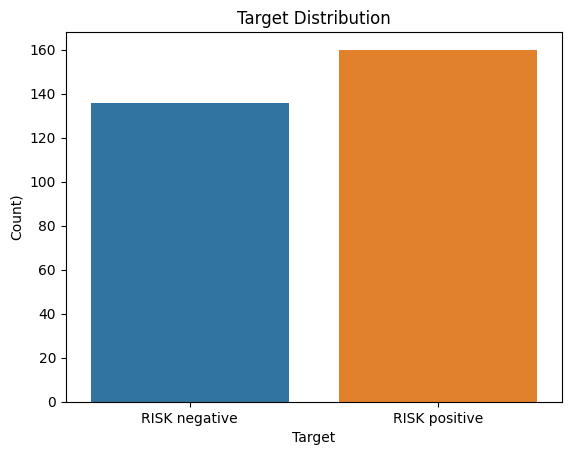

In [ ]:
#target distribution
sns.countplot(x='target', data=data, legend=False, hue='target')
plt.title('Target Distribution')
plt.xticks([0,1], ['RISK negative', 'RISK positive'])
plt.xlabel('Target')
plt.ylabel('Count)')
plt.title('Target Distribution')
plt.show()


Text(0, 0.5, 'Count')

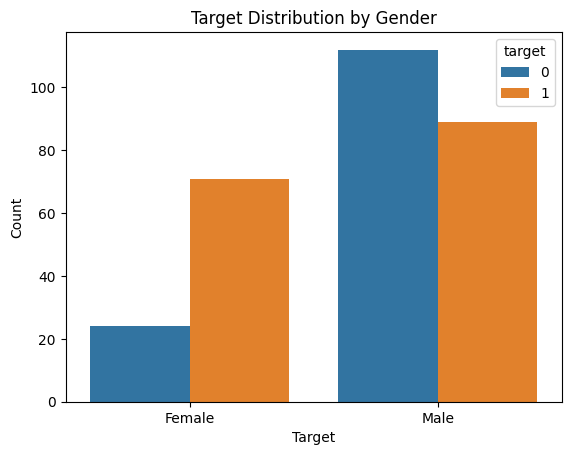

In [ ]:
#target based on gender distribution
sns.countplot(x='sex', data=data, hue='target')
plt.title('Target Distribution by Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Target')
plt.ylabel('Count')


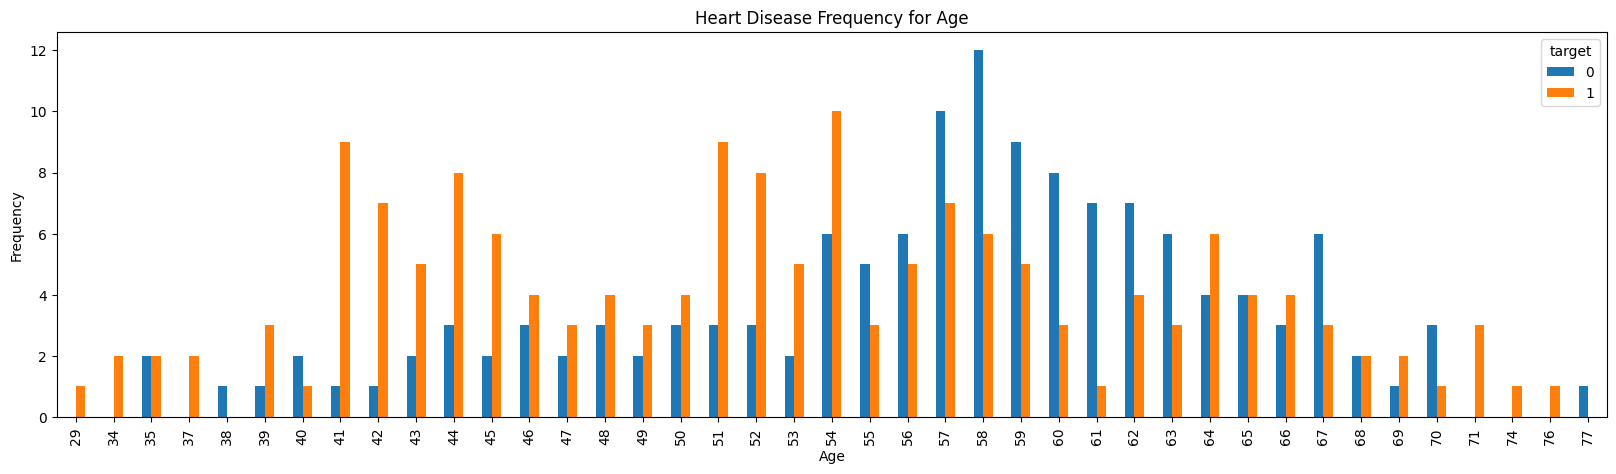

In [ ]:
#plot heart diease frequency based on age
pd.crosstab(data['age'], data['target']).plot(kind='bar',figsize=(20,5))
plt.title('Heart Disease Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

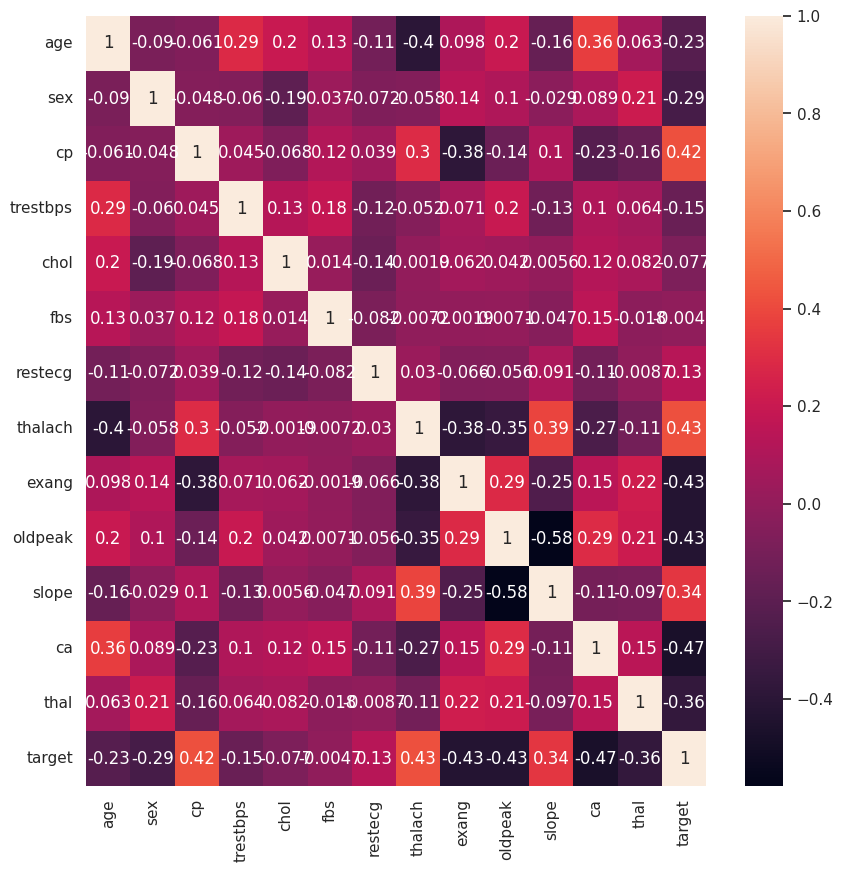

In [ ]:
#corelation between variables
sns.set(style='white')
plt.rcParams['figure.figsize'] = (10,10)
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#split the data set into training and tesing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#using standard scaller to standardize the independent variables in the X_train and X_test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.10997259,  0.68416745,  0.94616938, ..., -0.67725321,
        -0.75842365,  1.1412628 ],
       [ 0.88458534,  0.68416745, -0.95535549, ...,  0.97205755,
         1.39217492,  1.1412628 ],
       [ 0.11104028,  0.68416745,  0.94616938, ..., -0.67725321,
         0.31687563, -2.25789404],
       ...,
       [-0.55199833, -1.46163047, -0.00459306, ...,  0.97205755,
        -0.75842365, -0.55831562],
       [ 0.33205316,  0.68416745, -0.95535549, ..., -0.67725321,
         0.31687563,  1.1412628 ],
       [-0.55199833,  0.68416745,  0.94616938, ...,  0.97205755,
        -0.75842365, -0.55831562]])

In [ ]:
X_test_scaled

array([[-1.43604982,  0.68416745, -0.95535549, ..., -0.67725321,
        -0.75842365, -2.25789404],
       [-2.20959487,  0.68416745, -0.00459306, ...,  0.97205755,
        -0.75842365, -0.55831562],
       [ 1.32661108, -1.46163047,  0.94616938, ..., -0.67725321,
        -0.75842365,  1.1412628 ],
       ...,
       [ 1.32661108,  0.68416745, -0.95535549, ..., -0.67725321,
        -0.75842365, -0.55831562],
       [-1.21503695,  0.68416745, -0.00459306, ...,  0.97205755,
        -0.75842365, -0.55831562],
       [ 0.22154672,  0.68416745, -0.95535549, ...,  0.97205755,
        -0.75842365,  1.1412628 ]])

In [ ]:
#training the model with X_train_scaled and y_train w/ linear kernel
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train_scaled, y_train)
print(model_linear.score(X_train_scaled, y_train))

0.8599033816425121


In [ ]:
y_pred_linear = model_linear.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

[[32  3]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.94      0.83      0.88        54

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.88      0.87      0.87        89



In [ ]:
#training the model with X_train_scaled and y_train w/ poly kernel degree 5
model_poly = SVC(kernel='poly', degree=5)
model_poly.fit(X_train_scaled, y_train)
print(model_poly.score(X_train_scaled, y_train))

0.8743961352657005


In [ ]:
y_pred_poly = model_poly.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

[[22 13]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        35
           1       0.80      0.98      0.88        54

    accuracy                           0.84        89
   macro avg       0.88      0.81      0.82        89
weighted avg       0.86      0.84      0.83        89



In [ ]:
#training the model with X_train_scaled and y_train w/ rbf kernel
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(X_train_scaled, y_train)
print(model_rbf.score(X_train_scaled, y_train))

0.927536231884058


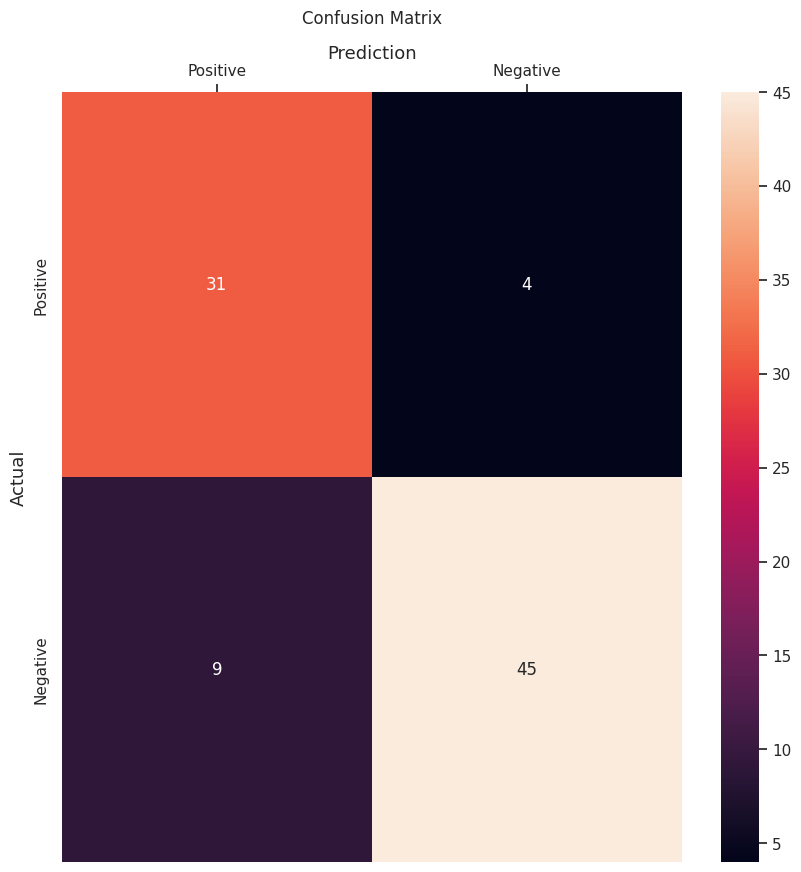

In [ ]:
y_pred_rbf = model_rbf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=12, pad=15)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.92      0.83      0.87        54

    accuracy                           0.85        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.86      0.85      0.86        89



In [ ]:
#export the ML moodel for implement on a web app
import pickle
from google.colab import files
pickle.dump(model_rbf, open('model.pkl', 'wb'))
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>